In [ ]:
pip install wfdb

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!unzip gdrive/MyDrive/dataset/mitbih.zip

In [ ]:
import sys
import os
import glob
import numpy as np
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import wfdb

In [ ]:
print(os.getcwd())
def get_records():
    """ Get paths for data in data/mit/ directory """
    #Download if doesn't exist
    
    # There are 3 files for each record
    # *.atr is one of them
    paths = glob.glob('mitbih/*.atr') # returns an array of path names that matches the arguement
    #paths = [os.path.join(os.getcwd(),path) for path in paths]
    # Get rid of the extension
    paths = [path[:-4] for path in paths]
    paths.sort()

    return paths

records = get_records()
print ('There are {} record files'.format(len(records)))
print (records)


/content
There are 48 record files
['mitbih/100', 'mitbih/101', 'mitbih/102', 'mitbih/103', 'mitbih/104', 'mitbih/105', 'mitbih/106', 'mitbih/107', 'mitbih/108', 'mitbih/109', 'mitbih/111', 'mitbih/112', 'mitbih/113', 'mitbih/114', 'mitbih/115', 'mitbih/116', 'mitbih/117', 'mitbih/118', 'mitbih/119', 'mitbih/121', 'mitbih/122', 'mitbih/123', 'mitbih/124', 'mitbih/200', 'mitbih/201', 'mitbih/202', 'mitbih/203', 'mitbih/205', 'mitbih/207', 'mitbih/208', 'mitbih/209', 'mitbih/210', 'mitbih/212', 'mitbih/213', 'mitbih/214', 'mitbih/215', 'mitbih/217', 'mitbih/219', 'mitbih/220', 'mitbih/221', 'mitbih/222', 'mitbih/223', 'mitbih/228', 'mitbih/230', 'mitbih/231', 'mitbih/232', 'mitbih/233', 'mitbih/234']


In [ ]:
def beat_annotations(annotation, type):
    """ Get rid of non-beat markers """
    """'N' for normal beats. Similarly we can give the input 'L' for left bundle branch block beats. 'R' for right bundle branch block
        beats. 'A' for Atrial premature contraction. 'V' for ventricular premature contraction. '/' for paced beat. 'E' for Ventricular
        escape beat."""
    
    good = [type] 
    ids = np.in1d(annotation.symbol, good)

    # We want to know only the positions
    beats = annotation.sample[ids]

    return beats



In [ ]:
import wfdb

def signal_segmentation(sig, type, output_dir=''):
    count = 1
    signals, fields = wfdb.rdsamp(sig, channels = [0,1])
    ann = wfdb.rdann(sig, 'atr')
    imp_beats = beat_annotations(ann, type)
    beats = (ann.sample)
    for i in tqdm(imp_beats):
        beats = np.array(beats)
        index_i = np.where(beats == i) # find the indexes (location tuples) of all imp_beats(desired annotated beats) inside the array of all beats
        j = index_i[0][0] # as numpy.where returns tuples we only need the first index of item that match
        if(j!=0 and j!=(len(beats)-1)):
            # according to paper
            sig_start = beats[j-1] + 20
            sig_end = beats[j+1] - 20
            data = signals[sig_start:sig_end, 0]
            
            # Plot and save the beat
            fig = plt.figure(dpi=300, frameon=False, figsize=(1.0,0.5))
            plt.plot(data, linewidth=0.5)
            plt.xticks([]), plt.yticks([])
            for spine in plt.gca().spines.values():
                spine.set_visible(False)
            filename = output_dir + 'fig_{}_{}'.format(sig[-3:],count) + '.png'  # sig[-3:] is the last 3 characters (mit-bih file number)
            fig.savefig(filename)
            plt.close()
            im_color = cv2.imread(filename, cv2.IMREAD_COLOR)
            im_color = cv2.copyMakeBorder(im_color,75,75,0,0, cv2.BORDER_REPLICATE) # as the image shape (from plt.savefig) is 300px*150px due to figsize=(1.0,0.5) and dpi=300 where dpi means dots(pixels) per inch
            im_color = cv2.resize(im_color, (150, 150), interpolation=cv2.INTER_LANCZOS4)
            cv2.imwrite(filename, im_color)
            print('img writtten {}'.format(filename))
            count += 1
        print('img completed {}'.format(sig))


In [ ]:
labels = ['a']
output_dirs = ['ABER/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:20]  # 6 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
labels = ['a']
output_dirs = ['ABER/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[25:48]  # 6 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
labels = ['A']
output_dirs = ['APB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:27]  # 27 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['E']
output_dirs = ['VEB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:30]  # 30 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['F']
output_dirs = ['FVN/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:29]  # 43 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['F']
output_dirs = ['FVN/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[34:48]  # 43 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['L']
output_dirs = ['LBBB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[30:49]  # 19 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['Q']
output_dirs = ['UCB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:28]  # 28 elememts out of 48 elements iteration due to RAM shortage,
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['R']
output_dirs = ['RBBB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:20]  # 20 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['S']
output_dirs = ['S/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[25:48]  # 23 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['V']
output_dirs = ['PVC/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:7]  # 7 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['J']
output_dirs = ['NB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:30]  # 30 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['/']
output_dirs = ['PB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:4]  # 6 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['!']
output_dirs = ['VF/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:48]  # 6 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['[']
output_dirs = ['AFIB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:48]  # 6 elememts out of 48 elements iteration due to RAM shortage
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

In [ ]:
labels = ['e']
output_dirs = ['VB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:48]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
labels = ['x']
output_dirs = ['VTA/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:48]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
labels = ['~']
output_dirs = ['AF/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:48]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
labels = ['|']
output_dirs = ['VT/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[1:48]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# count the length of different directory inside dataset and plot pie chart function

def plot_pie_chart_of_data(data, labels, colors, figName_with_ext, figureSize=(10,10), center_white_circle_radius=0.7):
    plt.figure(figsize=figureSize)
    my_circle=plt.Circle((0,0), center_white_circle_radius, color='white')
    plt.pie(data, labels= labels, colors= colors, autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()
    p.savefig(figName_with_ext, dpi=400, bbox_inches='tight')

Number of images in each directory=[53, 218, 105, 58, 274, 29, 265, 2, 227, 32, 98, 8, 6, 16, 63, 99, 136] and total number of images=1689


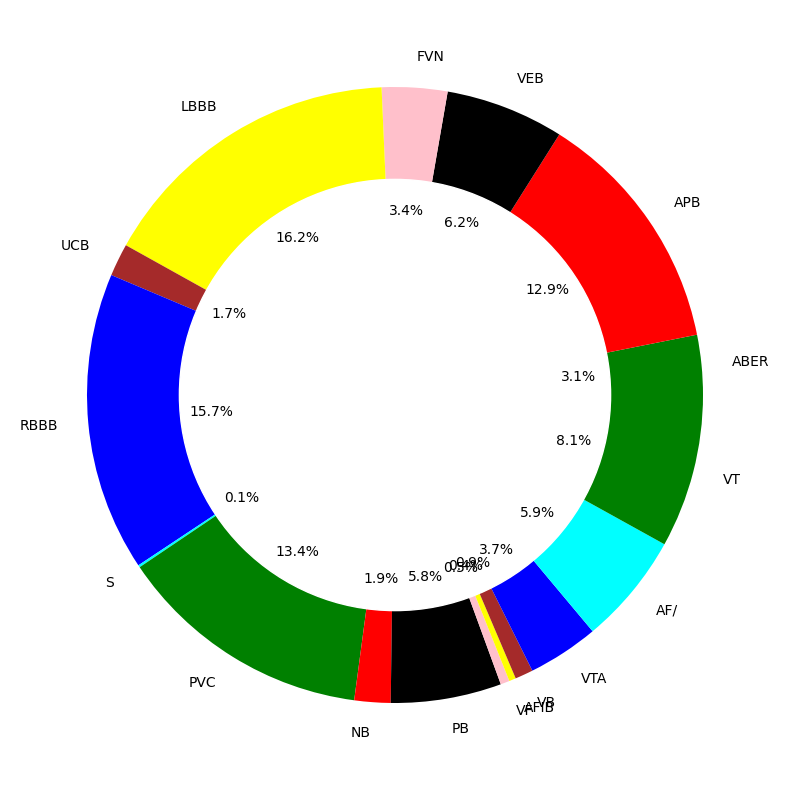

In [ ]:
# count the length of different directory inside dataset
Database_DIR = 'MIT-BIH_DATABASE/'
image_dirs = ['ABER/', 'APB/', 'VEB/', 'FVN', 'LBBB/', 'UCB/', 'RBBB/', 'S/', 'PVC/', 'NB/', 'PB/', 'VF/', 'AFIB/', 'VB/', 'VTA/', 'AF/', 'VT/']

no_of_files_in_dir=[]
for image_dir in image_dirs:
    path, dirs, files = next(os.walk(os.path.join(Database_DIR,image_dir)))
    no_of_files_in_dir.append(len(files)) 

print('Number of images in each directory={} and total number of images={}'.format(no_of_files_in_dir, sum(no_of_files_in_dir)))

labels = ['ABER', 'APB', 'VEB', 'FVN', 'LBBB', 'UCB', 'RBBB', 'S', 'PVC', 'NB', 'PB', 'VF', 'AFIB', 'VB', 'VTA', 'AF/', 'VT']
colors = ['green', 'red', 'black', 'pink', 'yellow', 'brown', 'blue', 'cyan', 'green', 'red', 'black', 'pink', 'yellow', 'brown', 'blue', 'cyan', 'green']

plot_pie_chart_of_data(no_of_files_in_dir,labels,colors, 'data_distribution.png')


In [ ]:
!zip -r /content/mitdb_images7.zip MIT-BIH_DATABASE

  adding: MIT-BIH_DATABASE/ (stored 0%)
  adding: MIT-BIH_DATABASE/AF/ (stored 0%)
  adding: MIT-BIH_DATABASE/AF/fig_104_9.png (deflated 7%)
  adding: MIT-BIH_DATABASE/AF/fig_105_8.png (deflated 9%)
  adding: MIT-BIH_DATABASE/AF/fig_105_31.png (deflated 9%)
  adding: MIT-BIH_DATABASE/AF/fig_104_12.png (deflated 8%)
  adding: MIT-BIH_DATABASE/AF/fig_107_2.png (deflated 12%)
  adding: MIT-BIH_DATABASE/AF/fig_104_23.png (deflated 6%)
  adding: MIT-BIH_DATABASE/AF/fig_105_25.png (deflated 11%)
  adding: MIT-BIH_DATABASE/AF/fig_207_6.png (deflated 12%)
  adding: MIT-BIH_DATABASE/AF/fig_104_13.png (deflated 10%)
  adding: MIT-BIH_DATABASE/AF/fig_105_9.png (deflated 10%)
  adding: MIT-BIH_DATABASE/AF/fig_105_16.png (deflated 8%)
  adding: MIT-BIH_DATABASE/AF/fig_207_2.png (deflated 10%)
  adding: MIT-BIH_DATABASE/AF/fig_104_31.png (deflated 11%)
  adding: MIT-BIH_DATABASE/AF/fig_105_55.png (deflated 9%)
  adding: MIT-BIH_DATABASE/AF/fig_104_34.png (deflated 13%)
  adding: MIT-BIH_DATABASE/AF/